0.5


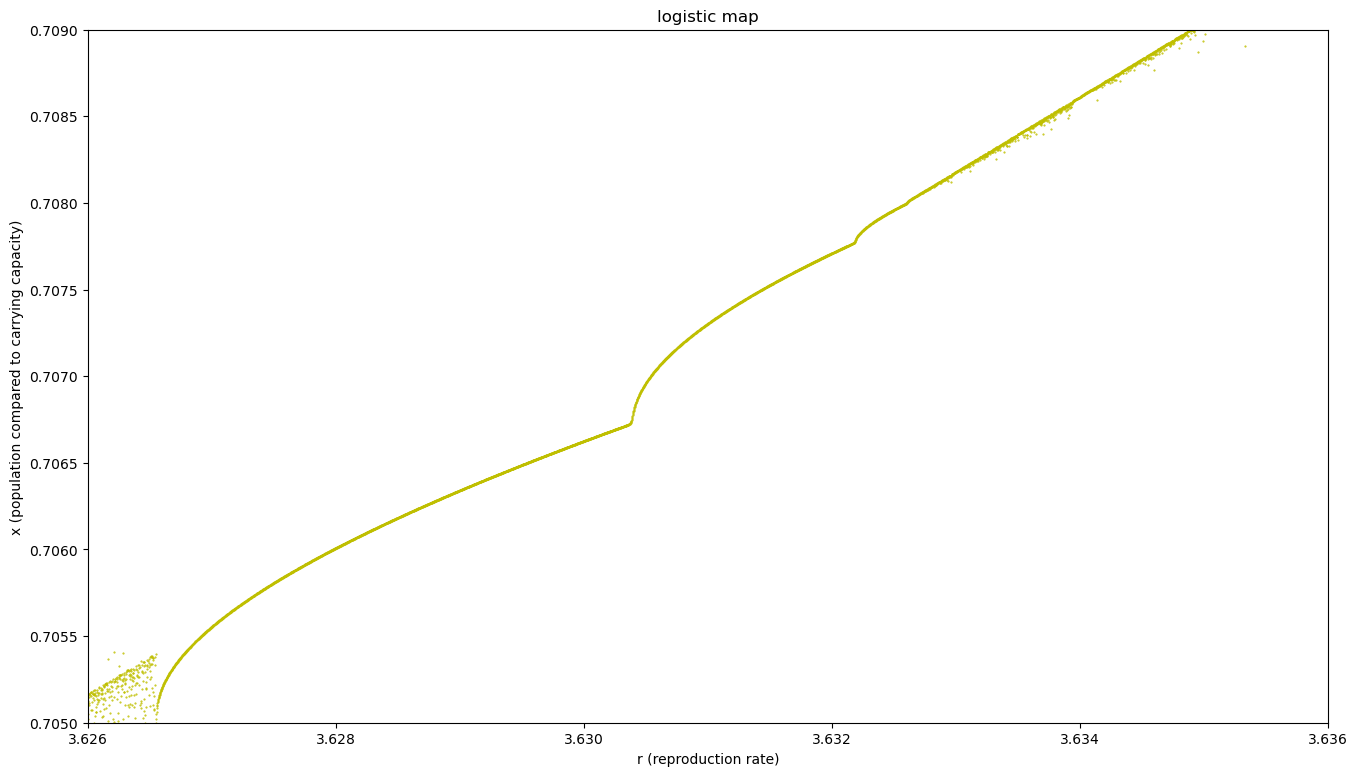

In [25]:
# ((2/3)*(1 +  (19 + 3*sqrt(33))^(1/3)  +  (19 - 3*sqrt(33))^(1/3)))*x = 3.67857
# 3.569946, 3.67857

bifurcation_points = {
    -3: [[-1.544090359551922]*2, [[]*2,[]*2,[]*2,[]*2]],
    -2: [[1-6**(1/2)]*2, [[(2+2**(1/2)-6**(1/2))/(2-2*6**(1/2))]*2, [(2**(1/2)+6**(1/2)-2)/(2*6**(1/2)-2)]*2]],
    -1: [[-1]*2, [[0]*2]],
    0:  [[1]*2, [[0]*2]],
    1:  [[3]*2, [[2/3]*2]],
    2:  [[1+6**(1/2)]*2, [[(2-2**(1/2)+6**(1/2))/(2+2*6**(1/2))]*2, [(2**(1/2)+6**(1/2)+2)/(2*6**(1/2)+2)]*2]],
    3:  [[+3.544090359551922]*2, [[0.363290]*2,[0.523594]*2,[0.819785]*2,[0.884049]*2]], # https://oeis.org/A086181
    4:  [[+3.564407266095432]*2, [[0.346764]*2,[0.374767]*2,[0.490608]*2,[0.554272]*2,[0.807405]*2,[0.8352]*2,[0.880603]*2,[0.890787]*2]], # https://oeis.org/A091517
    5:  [[+3.5687594]*2, [[0.343409]*2,[0.347946]*2,[0.367903]*2,[0.379693]*2,[0.478338]*2,[0.50375]*2,[0.549942]*2,[0.560899]*2,[0.804681]*2,[0.809679]*2,[0.829916]*2,[0.840537]*2,[0.878954]*2,[0.883289]*2,[0.890515]*2,[0.89214]*2]], # approximate r-values found at https://en.wikipedia.org/wiki/Feigenbaum_constants and https://mathworld.wolfram.com/LogisticMap.html
    6:  [[+3.5696916]*2, [[]*2]],
    7:  [[+3.5698913]*2, [[]*2]],
    8:  [[+3.5699340]*2, [[]*2]],
    9:  [[+3.569943]*2, [[]*2]],
    10: [[+3.5699451]*2, [[]*2]],
    11: [[+3.569945557]*2, [[]*2]]
}
singularity_points = {
    -1: [[2/3*(2-4/(19-3*33**(1/2))**(1/3)-(19-3*33**(1/2))**(1/3))]*2, [[0]*2]],
    0:  [[4]*2, [[0]*2]],
    1:  [[2/3*(1+(19+3*33**(1/2))**(1/3)+(19-3*33**(1/2))**(1/3))]*2, [[(7-2/(3*33**(1/2)-17)**(1/3)+(3*33**(1/2)-17)**(1/3))/6]*2]],
    2:  [[3.5925721,3.5925722], [[.4095806,.4095807],[.8687714,.8687715]]],
    3:  [[3.5748049,3.5748050], [[.3527639,.3527640],[.5362722,.5362724],[.8162049,.8162050],[.8889979,.8889980]]],
    4:  [[3.5709859,3.5709860], [[.3440254,.3440255],[.3758444,.3758445],[.4855038,.4855039],[.5586547,.5586548],[.8058713,.8058714],[.8377011,.8377012],[.8804609,.8804610],[.8919960,.8919961]]],
    5:  [[3.5701684,3.5701685], [[.3427530,.3427531],[.3478977,.3478978],[.3667295,.3667297],[.3802447,.3802448],[.4765682,.4765683],[.5057924,.5057926],[.5495685,.5495686],[.5620282,.5620283],[.8042639,.8042640],[.8099459,.8099460],[.8291323,.8291324],[.8413411,.8413412],[.8788058,.8788059],[.8837700,.8837701],[.8905819,.8905820],[.8924223,.8924224]]],
    6:  [[], [[]*2]],
    7:  [[], [[]*2]],
    8:  [[], [[]*2]],
    9:  [[], [[]*2]],
    10: [[], [[]*2]],
    11: [[], [[]*2]]
}

""""""
# both even and odd maxima converge to 2/3*(1+(19+3*33**(1/2))**(1/3)+(19-3*33**(1/2))**(1/3))
odd_maxima = [[4,3.678573510428322,3], [1+8**(1/2),3.8318740,-999], 3.7389149, 3.7017691, 3.6872161]
even_maxima = [[3,2,1], [1+6**(1/2),1+5**(1/2),3], 3.6275575, 3.6621925, 3.6730082]
power_maxima = [2, 1+5**(1/2), 3.4985616, 3.5546408, 3.5666673, 3.5692435, 3.5697952, 3.5699134, 3.5699387]

import numpy as np
import matplotlib.pyplot as plt
import math

def logistic_map_core(r):
    reps = 4000
    numtoplot = 256
    
    lims = np.zeros(reps)
    lims[0] = .5
    for i in range(reps-1):
        lims[i+1] = r*(lims[i])*(1 - lims[i])
        if abs(lims[i+1]) > 3/2:
            break
    return lims[reps-numtoplot:]

def logistic_cycle_inflection(below, above):
    epsilon = 1e-8
    epsilon2 = 1e-9
    
    below_evaluation = max(logistic_map_core(below)) - below/4
    above_evaluation = max(logistic_map_core(above)) - above/4
    while below + epsilon < above:
        middle = below + (above-below)/2
        below2 = middle - epsilon2
        below2_evaluation = max(logistic_map_core(below2)) - below2/4
        above2 = middle + epsilon2
        above2_evaluation = max(logistic_map_core(above2)) - above2/4
        if above2_evaluation == below2_evaluation:
            if above_evaluation < below_evaluation:
                above = above2
                above_evaluation = above2_evaluation
            else:
                below = below2
                below_evaluation = below2_evaluation
        elif above2_evaluation < below2_evaluation:
            above = above2
            above_evaluation = above2_evaluation
        else:
            below = below2
            below_evaluation = below2_evaluation
    return below if below_evaluation > above_evaluation else above

def logistic_cycle(r, c):
    epsilon = 1e-8
    
    additive_rounds = 2000
    converging_rounds = 2000
    
    lims = np.zeros(2*c+1)
    lims[0] = .5
    #print("adding...")
    for a in range(additive_rounds):
        for i in range(c):
            lims[i+1] = r*(lims[i])*(1 - lims[i])
        lims[0] = (lims[0] + lims[c])/2
        #print(lims[0])
    #print("converging...")
    for a in range(converging_rounds):
        for i in range(2*c):
            lims[i+1] = r*(lims[i])*(1 - lims[i])
        lims[0] = lims[2*c]
        #print(lims[0])
    cycle_within_margin = True
    for i in range(c):
        if abs(lims[i] - lims[i+c]) > epsilon:
            cycle_within_margin = False
    #print("ending...", cycle_within_margin)     
    return cycle_within_margin

def logistic_cycle_edge(below, above, c):
    epsilon = 1e-8
    
    if below > above:
        (below, above) = (above, below)
    below_cycles = logistic_cycle(below, c)
    above_cycles = logistic_cycle(above, c)
    
    if above_cycles and below_cycles:
        return "Only one input should cycle (not two)"
    if not above_cycles and not below_cycles:
        return "One input should cycle (not zero)"
    
    while above - below > epsilon:
        middle = (above + below)/2
        middle_cycles = logistic_cycle(middle, c)
        if middle_cycles == below_cycles:
            below = middle
        else:
            above = middle
    return below if below_cycles else above

def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

def logistic_cycle_statistics(below, middle, above, c):
    lower = logistic_cycle_edge(below, middle, c) 
    upper = logistic_cycle_edge(middle, above, c)
    extrema = logistic_cycle_inflection(lower, upper)
    lower_string = "%.7f" % truncate(lower, 7)
    upper_string = "%.7f" % truncate(upper, 7)
    extrema_string = "%.7f" % truncate(extrema, 7)
    return (lower_string, extrema_string, upper_string)

def logistic_map(x_window=[-2, +4], y_window=[-1/2, +3/2], accuracy_scale=1, brightness=1):
    epsilon = .001
    if x_window[1] == x_window[0]:
        x_window[0] -= epsilon
        x_window[1] += epsilon
    if y_window[1] == y_window[0]:
        y_window[0] -= epsilon
        y_window[1] += epsilon

    reps = 4000  # number of repetitions
    numtoplot = 256

    fig, biax = plt.subplots()
    fig.set_size_inches(16, 9)

    accuracy = 6000*accuracy_scale
    accuracy = (x_window[1] - x_window[0])/accuracy

    lims = np.zeros(reps)
    lims[0] = 1/2 #np.random.uniform(0,1) # np.random.uniform(y_window[0], y_window[1])
    print(lims[0])
    plt.xlim(x_window[0], x_window[1])
    plt.ylim(y_window[0], y_window[1])
    for r in np.arange(x_window[0], x_window[1], accuracy):
        for i in range(reps-1):
            lims[i+1] = r*(lims[i])*(1 - lims[i])
            if abs(lims[i+1]) > 3/2:
                break
        biax.plot([r]*numtoplot, lims[reps-numtoplot:], 'g.', markersize=(5*brightness/numtoplot))
        biax.plot([r], np.median(lims[reps-numtoplot:]), 'y.', markersize=1)
        #biax.plot([r], np.median(lims[reps-numtoplot:]), 'y.', markersize=1)
        #biax.plot([(r)], [0], 'y.', markersize=1)
        #biax.plot([(r)], [(r-1)/r], 'y.', markersize=1)
        #biax.plot([(r)], [((r+1) + math.sqrt(max(0, (r+1)*(r-3))))/(2*r)], 'y.', markersize=1)
        #biax.plot([(r)], [((r+1) - math.sqrt(max(0, (r+1)*(r-3))))/(2*r)], 'y.', markersize=1)
        #biax.plot([(r)], [(r*(r/4)*(1-r/4))], 'y.', markersize=1)
        #biax.plot([(r)], [(r/4)], 'y.', markersize=1)
    biax.set(xlabel='r (reproduction rate)', ylabel='x (population compared to carrying capacity)', title='logistic map')
    plt.show()

def check_bifurcation(x,y):
    x_range = bifurcation_points[x][0]
    y_range = bifurcation_points[x][1][y]
    logistic_map(x_range, y_range, .01, 30)
    print(x_range, y_range)

def check_singularity(x,y):
    logistic_map(singularity_points[x][0], singularity_points[x][1][y],.1,30)
    
# check_singularity(1,0)

#logistic_map([3.5925721, 3.5925722], [.8687714, .8687715],1,40) # [3.569946, 3.67857])

logistic_map([3.626, 3.636], [.705, .709], 1, 1)

#logistic_map([3.5701684,3.5701685], [.8413411,.8413412],1,44)
#logistic_map([3.570, 4], [.3, 1])
#logistic_map([3.6873, 3.6873078718714334], [.497, .498], .2, 1)

#logistic_cycle(1+8**.5, 3)
#print(logistic_cycle_statistics(3.60, 3.6275575 , 3.65, 6))
#print("%.7f" % truncate(logistic_cycle_inflection(3.6817161, 3.68173), 7))
#for i in range(9):
#    print("%.7f" % truncate(logistic_cycle_max(bifurcation_points[i][0][0],bifurcation_points[i+1][0][0]), 7))